In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from itertools import cycle
import re

In [2]:
def read_file_ribo(file_name, one_type_reads, all_reada, one_type_modifs, all_modifs):
    f = open(file_name, 'r', encoding='utf8')
    line = f.readline().strip()
    while line != '':
        parts = re.split('\s+', line)
        one_type_reads.append(parts[0])
        all_reads.append(parts[0])
        modif = parts[1:]
        one_type_modifs.append(list(int(i) for i in modif))
        all_modifs.append(list(int(i) for i in modif))
        line = f.readline().strip()
    f.close()

In [3]:
def read_file_simulated(file_name, type1_reads, type2_reads, all_reads, type1_modifs, type2_modifs, all_modifs):
    f = open(file_name, 'r')
    line = f.readline().strip()
    while line != '':
        parts = re.split('\t', line)
        modif = parts[1].split(" ")
        if parts[2] == '0':
            type1_reads.append(parts[0])
            type1_modifs.append(list(int(i) for i in modif))
        else:
            type2_reads.append(parts[0])
            type2_modifs.append(list(int(i) for i in modif))
        
        all_reads.append(parts[0])
        all_modifs.append(list(int(i) for i in modif))
        line = f.readline().strip()
    f.close()

In [4]:
def read_significant_positions(file_name):
    positions = []
    f = open(file_name, 'r')
    line = f.readline()
    positions = line.strip().split("\t")
    return positions

In [5]:
def get_reads_for_observing(file_name, reads_for_observing, reads_for_observing_with_name):
    f = open(file_name, "r")
    line = f.readline()
    while line != "":
        parts = line.strip().split("\t")
        modifs = parts[1].split(" ")
        reads_for_observing.append(modifs)
        reads_for_observing_with_name.append((modifs, parts[0]))
        line = f.readline()
    f.close()

In [6]:
def elbow_method(X):
    distortions = []
    K = range(1,10)
    for n_clusters in K: 
        kmeans_model = KMeans(n_clusters=n_clusters)
        kmeans = kmeans_model.fit(X)
        distortions.append(kmeans_model.inertia_)

    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [7]:
def plot_figure_pca(X):
    pca = PCA(n_components=2)
    new_X = pca.fit_transform(X)

    k_means_cluster_centres = kmeans.cluster_centers_
    new_cluster_centres = pca.transform(k_means_cluster_centres)
    
    fig = plt.figure(1)
    plt.figure(figsize=(15,10))
    k_means_labels = kmeans.labels_
    colors =  cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = new_cluster_centres[k]
        plt.plot(new_X[my_members, 0], new_X[my_members, 1], col+'.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=10)

    plt.title('PCA - Number of clusters: %d' % n_clusters)
    plt.show()

In [20]:
def save_clusters(filename, reads, labels):
    f = open(filename, "w")
    for i, read in enumerate(reads):
        label = labels[i]
        line = read + " : " + str(label) + "\n"
        f.write(line)
    f.close

# FILE READING REAL DATA

In [14]:
ligand_reads = []
noligand_reads = []
all_reads = []
ligand_modifs = []
noligand_modifs = []
all_modifs = []

read_file_ribo('TPP_TenA_ligand.tsv', ligand_reads, all_reads, ligand_modifs, all_modifs)
read_file_ribo('TPP_TenA_noligand.tsv', noligand_reads, all_reads, noligand_modifs, all_modifs)


# FILE READING SIMULATED DATA

In [22]:
ligand_reads = []
noligand_reads = []
all_reads = []
ligand_modifs = []
noligand_modifs = []
all_modifs = []

read_file_simulated("TPP_simulated_reads_for_clustering_beginning_end_middle4010.txt", 
                    ligand_reads, noligand_reads, all_reads, ligand_modifs, noligand_modifs, 
                    all_modifs)

# REAL DATA

In [15]:
positions = read_significant_positions("TPP_significant_positions.txt")

In [16]:
reads_for_observing = []
reads_for_observing_with_name = [] 
get_reads_for_observing("TPP_reads_with_significant_positions.txt", reads_for_observing, reads_for_observing_with_name)

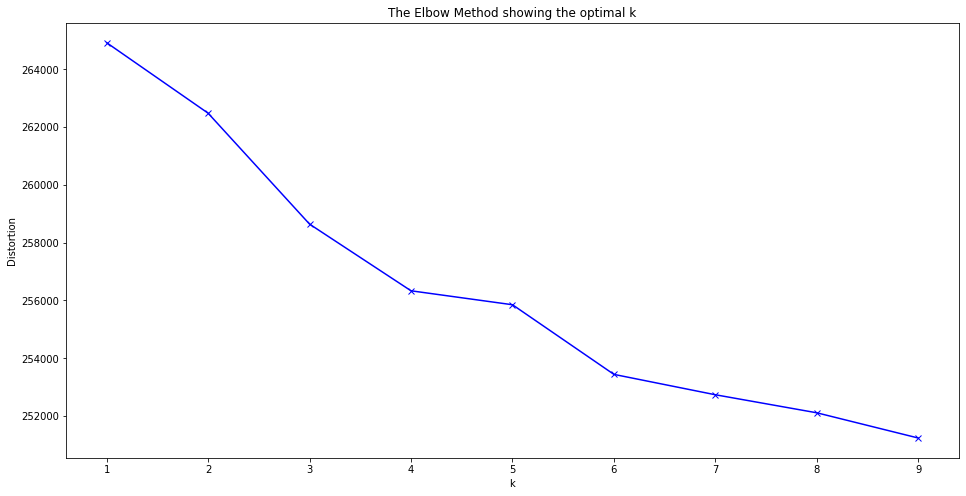

In [17]:
elbow_method(all_modifs)

<Figure size 432x288 with 0 Axes>

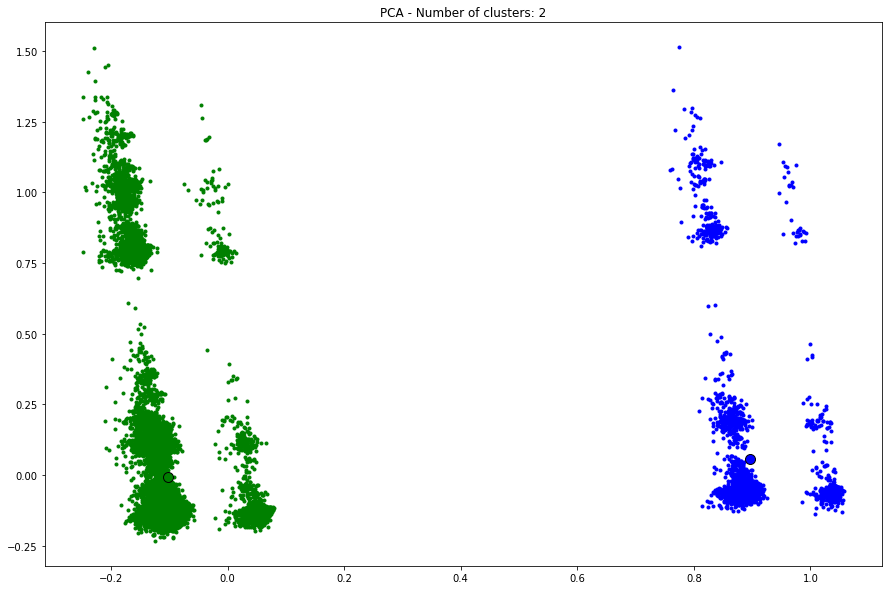

In [18]:
n_clusters = 2
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans = kmeans_model.fit(all_modifs)

plot_figure_pca(all_modifs)

In [21]:
save_clusters("TPP_kmeans_sigpos_clusters.txt", all_reads, list(kmeans_model.labels_))

# SIMULATED DATA

In [23]:
positions = read_significant_positions("TPP_simulated_significant_positions.txt")

In [24]:
reads_for_observing = []
reads_for_observing_with_name = [] 
get_reads_for_observing("TPP_simulated_reads_with_significant_positions.txt", reads_for_observing, reads_for_observing_with_name)

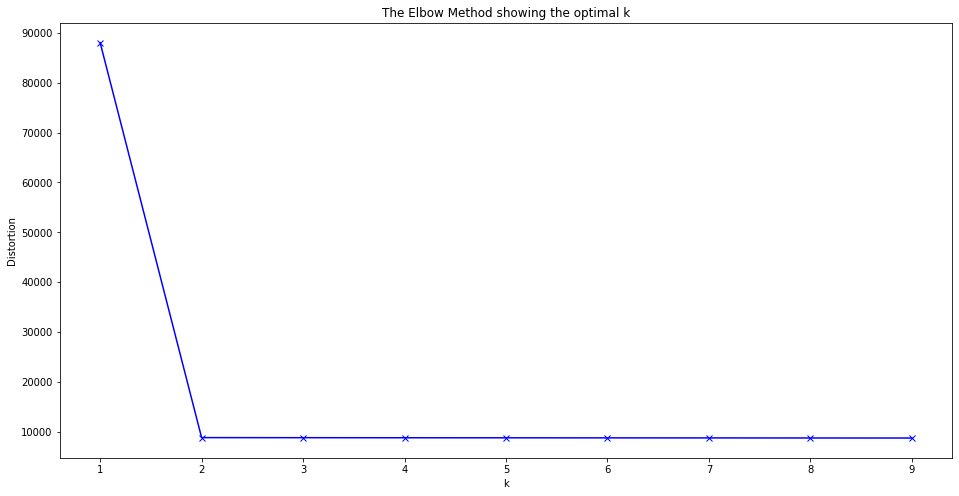

In [25]:
elbow_method(all_modifs)

<Figure size 432x288 with 0 Axes>

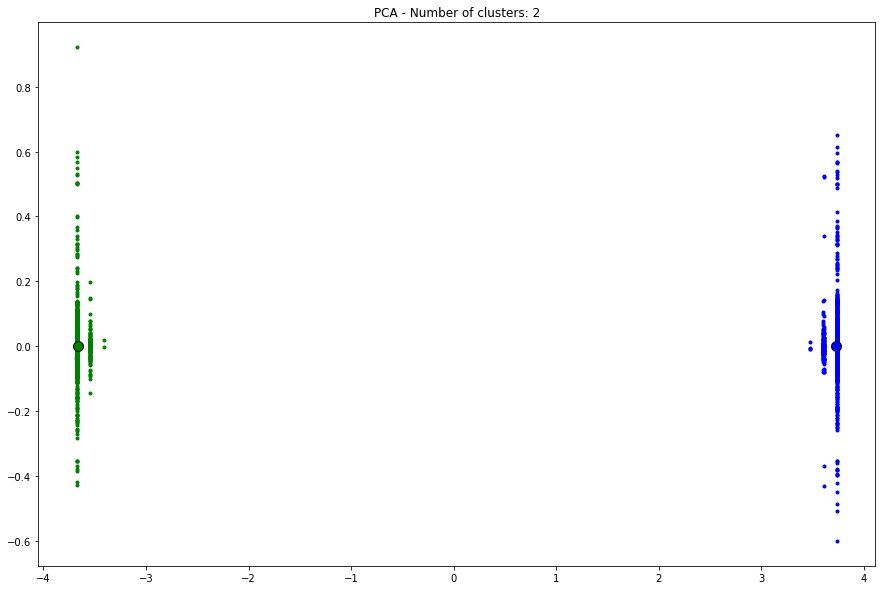

In [26]:
n_clusters = 2
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans = kmeans_model.fit(all_modifs)

plot_figure_pca(all_modifs)

In [27]:
save_clusters("TPP_simulated_kmeans_sigpos_clusters.txt", all_reads, list(kmeans_model.labels_))